In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
df_train=train.copy()
df_test=test.copy()

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
df_test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [9]:
df_train.shape,df_test.shape

((891, 12), (418, 11))

In [10]:
df_train['age_ismissing']=np.where(df_train['Age'].isnull(),1,0)
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())
df_test['age_ismissing']=np.where(df_test['Age'].isnull(),1,0)
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean())

In [11]:
df_train['Age'].isnull().any()

False

In [12]:
df_train['Embarked']=df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].median())


In [13]:
df_train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

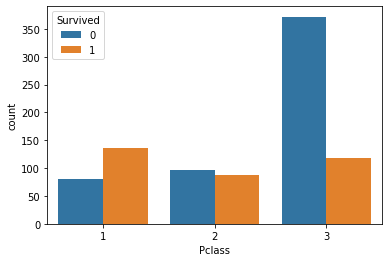

In [14]:
sns.countplot(df_train['Pclass'],hue=df_train['Survived'])

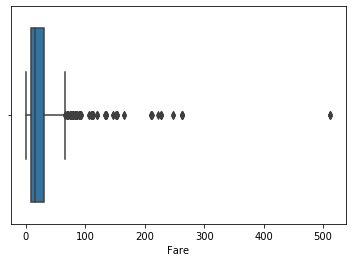

In [15]:
sns.boxplot(df_train['Fare'])

In [16]:
std=df_train['Fare'].std()
mean=df_train['Fare'].mean()
mean+3*std

181.2844937601173

In [17]:
df_train['Fare_bin']=pd.cut(df_train['Fare'],bins=[-10,20,50,100,1000],labels=['VeryLow','Low','Medium','High'])
df_test['Fare_bin']=pd.cut(df_test['Fare'],bins=[-10,20,50,100,1000],labels=['VeryLow','Low','Medium','High'])

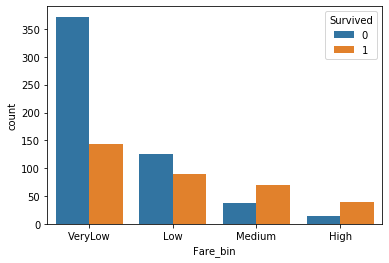

In [18]:
sns.countplot(df_train['Fare_bin'],hue=df_train['Survived'])

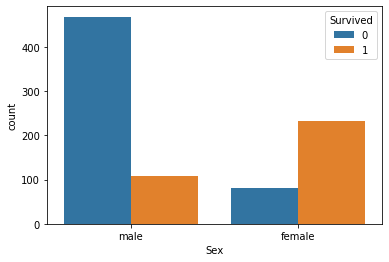

In [19]:
sns.countplot(df_train['Sex'],hue=df_train['Survived'])

In [20]:
df_train['Sex_enc']=np.where(df_train['Sex']=='male',1,0)
df_test['Sex_enc']=np.where(df_test['Sex']=='male',1,0)

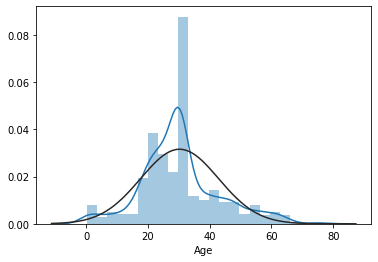

In [21]:
sns.distplot(df_test['Age'],fit=stats.norm)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_train['Age']=sc.fit_transform(df_train[['Age']])
df_test['Age']=sc.transform(df_test[['Age']])
df_train['Age']

0     -0.592481
1      0.638789
2     -0.284663
3      0.407926
4      0.407926
         ...   
886   -0.207709
887   -0.823344
888    0.000000
889   -0.284663
890    0.177063
Name: Age, Length: 891, dtype: float64

In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_ismissing,Fare_bin,Sex_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.592481,1,0,A/5 21171,7.2500,NaN,S,0,VeryLow,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,1,0,PC 17599,71.2833,C85,C,0,Medium,0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.284663,0,0,STON/O2. 3101282,7.9250,NaN,S,0,VeryLow,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,1,0,113803,53.1000,C123,S,0,Medium,0
4,5,0,3,"Allen, Mr. William Henry",male,0.407926,0,0,373450,8.0500,NaN,S,0,VeryLow,1


In [24]:
cols_to_drop=['PassengerId','Name','Sex','Ticket','Cabin','Fare']

In [25]:
df_train.drop(cols_to_drop,axis=1,inplace=True)
df_test.drop(cols_to_drop,axis=1,inplace=True)

In [26]:
df_train_encoded=pd.get_dummies(df_train,drop_first=True)
df_test_encoded=pd.get_dummies(df_test,drop_first=True)

In [27]:
del df_train_encoded['Survived']
y=train['Survived']

In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(df_train_encoded,y,stratify=y,test_size=0.2)

In [33]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,make_scorer

In [53]:
logreg=LogisticRegressionCV(cv=5).fit(X_train,y_train)
pred=logreg.predict(X_test)
accuracy_score(y_test,pred)

0.8156424581005587

In [56]:
svc=SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
param_sv={'C':[1,10,100,1000],'gamma':[0.001,0.01,0.1,1]}
accuracy_score(y_test,pred)

0.8324022346368715

In [94]:
rclf=RandomForestClassifier(criterion='entropy',max_depth=6,n_estimators=300)
rclf.fit(X_train,y_train)
pred=rclf.predict(X_test)
params_rf={'n_estimators':[100,200,300,400],'max_depth' : [2,3,4,5,6],'criterion' :['gini', 'entropy']}
accuracy_score(y_test,pred)

0.8156424581005587

In [158]:
sgclf=GradientBoostingClassifier(learning_rate=0.01,min_samples_leaf=0.2,n_estimators=1100,subsample=0.9)
sgclf.fit(X_train,y_train)
pred=sgclf.predict(X_test)
params_sg={'learning_rate':[0.001,0.01,1],'n_estimators':[900,1000,1100,1200],'subsample':[0.85,0.9],'min_samples_leaf':[0.1,0.12,0.11]}
accuracy_score(y_test,pred)

0.7988826815642458

In [190]:
xgclf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.002, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=1350, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgclf.fit(X_train,y_train)
pred=xgclf.predict(X_test)
params_xg={'learning_rate':[0.001,0.01,0.002],'n_estimators':[1350,1400,1450],'max_depth':[5,6,7,8]}
accuracy_score(y_test,pred)

0.8044692737430168

In [207]:
import lightgbm as lgb
lgclf=lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgclf.fit(X_train,y_train)
pred=xgclf.predict(X_test)
params_lg={'learning_rate':[0.001,0.01,0.1],'n_estimators':[1000,1100,1200],'max_depth':[5,6,7,8]}
accuracy_score(y_test,pred)

0.8044692737430168

In [225]:
from sklearn.ensemble import VotingClassifier
classifier=[('svc',svc),
           ('random_forest',rclf),
           ('stochastic_gradient',sgclf),
           ('xgboost',xgclf),
           ('lightgbm',lgclf)]
vclf=VotingClassifier(estimators=classifier)
vclf.fit(df_train_encoded,y)
pred=vclf.predict(df_test_encoded)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [274]:
df=pd.DataFrame(rclf.feature_importances_)
df.index=df_test_encoded.columns.tolist()
df.sort

[0]

In [251]:
sub=pd.concat([test['PassengerId'],pd.Series(pred)],axis=1,ignore_index=True)

In [252]:
sub.columns=['PassengerId','Survived']
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [253]:
sub.to_csv('Submission.csv',index=False)

In [201]:
# gcv=GridSearchCV(estimator=lgb.LGBMClassifier(),param_grid=params_lg,cv=5,scoring=make_scorer(accuracy_score),verbose=3,n_jobs=-1)
# gcv.fit(X_train,y_train)
# print(gcv.best_score_)
# print(gcv.best_params_)
# print(gcv.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   17.2s finished


0.8229685807150595
{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1100}
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
